# Algorithms Exercise 1

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## Word counting

Write a function `tokenize` that takes a string of English text returns a list of words. It should also remove [stop words](http://en.wikipedia.org/wiki/Stop_words), which are common short words that are often removed before natural language processing. Your function should have the following logic:

* Split the string into lines using `splitlines`.
* Split each line into a list of words and merge the lists for each line.
* Use Python's builtin `filter` function to remove all punctuation.
* If `stop_words` is a list, remove all occurences of the words in the list.
* If `stop_words` is a space delimeted string of words, split them and remove them.
* Remove any remaining empty words.
* Make all words lowercase.

In [2]:
def tokenize(s, stop_words=None, punctuation='`~!@#$%^&*()_-+={[}]|\:;"<,>.?/}\t'):
    """Split a string into a list of words, removing punctuation and stop words."""
    low = []
    t = s.splitlines()
    for i in range(len(t)):
        u = t[i].split()
        for j in range(len(u)):
            low.append(u[j])                        # Turns multi-lined string into neat list
    no_more_punc = []
    for k in range(len(low)):
        no_more_punc.append(''.join(list(filter(lambda x: not x in punctuation, low[k]))))      # Removes punctuation
    if type(stop_words)==list:
        no_more_stops = list(filter(lambda x: not x in stop_words, no_more_punc))               # Removes stop words
    elif type(stop_words)==str:
        no_more_stops = list(filter(lambda x: not x in stop_words.split(), no_more_punc))       # for different input types
    elif stop_words==None:
        no_more_stops = no_more_punc
    no_gaps = list(filter(lambda x: not x=='', no_more_stops))                                  # Removes empty strings
    all_low = []
    for l in range(len(no_gaps)):
        all_low.append(no_gaps[l].lower())                                                      # Removes any capitalization
    return all_low

In [3]:
tokenize("This, is the way; that things will end", stop_words=['the', 'is'])

['this', 'way', 'that', 'things', 'will', 'end']

In [4]:
assert tokenize("This, is the way; that things will end", stop_words=['the', 'is']) == \
    ['this', 'way', 'that', 'things', 'will', 'end']
wasteland = """
APRIL is the cruellest month, breeding
Lilacs out of the dead land, mixing
Memory and desire, stirring
Dull roots with spring rain.
"""

assert tokenize(wasteland, stop_words='is the of and') == \
    ['april','cruellest','month','breeding','lilacs','out','dead','land',
     'mixing','memory','desire','stirring','dull','roots','with','spring',
     'rain']

Write a function `count_words` that takes a list of words and returns a dictionary where the keys in the dictionary are the unique words in the list and the values are the word counts.

In [5]:
p = [1,2,3]
q = ['one','two','three']
pq = []
for i in range(len(p)):
    pq.append((p[i],q[i]))
d = dict(pq)
d

{1: 'one', 2: 'two', 3: 'three'}

In [6]:
def count_words(data):
    """Return a word count dictionary from the list of words in data."""
    word = []
    count = []
    for i in range(len(data)):
        if not data[i] in word:
            word.append(data[i])
            count.append(1)
        elif data[i] in word:
            for j in range(len(word)):
                if word[j]==data[i]:
                    count[j]+=1
    wc = []
    for j in range(len(word)):
        wc.append((word[j],count[j]))
    wcd = dict(wc)
    return wcd

In [7]:
count_words(tokenize('this and the this from and a a a'))

{'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

In [8]:
assert count_words(tokenize('this and the this from and a a a')) == \
    {'a': 3, 'and': 2, 'from': 1, 'the': 1, 'this': 2}

Write a function `sort_word_counts` that return a list of sorted word counts:

* Each element of the list should be a `(word, count)` tuple.
* The list should be sorted by the word counts, with the higest counts coming first.
* To perform this sort, look at using the `sorted` function with a custom `key` and `reverse`
  argument.

In [9]:
wiggity = [(1,'one'),(3,'three'),(2,'two')]
sorted(wiggity, key=lambda x: x[0], reverse=True)

[(3, 'three'), (2, 'two'), (1, 'one')]

In [10]:
boogity = {1:2,2:3,3:4}
list(iter(boogity)),boogity[1]

([1, 2, 3], 2)

In [11]:
def sort_word_counts(wc):
    """Return a list of 2-tuples of (word, count), sorted by count descending."""
    word = list(iter(wc))
    count = []
    for i in word:
        count.append(wc[i])
    tups = []
    for j in range(len(word)):
        tups.append((word[j],count[j]))
    return sorted(tups, key=lambda x: x[1], reverse=True)

In [12]:
sort_word_counts(count_words(tokenize('this and a the this this and a a a')))

[('a', 4), ('this', 3), ('and', 2), ('the', 1)]

In [13]:
assert sort_word_counts(count_words(tokenize('this and a the this this and a a a'))) == \
    [('a', 4), ('this', 3), ('and', 2), ('the', 1)]

Perform a word count analysis on Chapter 1 of Moby Dick, whose text can be found in the file `mobydick_chapter1.txt`:

* Read the file into a string.
* Tokenize with stop words of `'the of and a to in is it that as'`.
* Perform a word count, the sort and save the result in a variable named `swc`.

In [14]:
with open('mobydick_chapter1.txt', 'r') as f:
    read_text = f.read()
f.closed

True

In [15]:
swc = sort_word_counts(count_words(tokenize(read_text, 'the of and a to in is it that as')))

In [16]:
assert swc[0]==('i',43)
assert len(swc)==848

Create a "Cleveland Style" [dotplot](http://en.wikipedia.org/wiki/Dot_plot_%28statistics%29) of the counts of the top 50 words using Matplotlib. If you don't know what a dotplot is, you will have to do some research...

In [17]:
swc

[('i', 43),
 ('me', 24),
 ('all', 23),
 ('you', 23),
 ('this', 17),
 ('for', 16),
 ('but', 15),
 ('there', 15),
 ('my', 14),
 ('with', 13),
 ('go', 12),
 ('they', 12),
 ('on', 12),
 ('not', 11),
 ('some', 11),
 ('from', 11),
 ('sea', 10),
 ('one', 10),
 ('his', 10),
 ('or', 10),
 ('upon', 9),
 ('be', 9),
 ('he', 9),
 ('into', 9),
 ('if', 9),
 ('by', 8),
 ('have', 8),
 ('was', 8),
 ('and', 7),
 ('were', 7),
 ('what', 7),
 ('do', 7),
 ('part', 7),
 ('why', 7),
 ('voyage', 6),
 ('like', 6),
 ('water', 6),
 ('about', 6),
 ('will', 6),
 ('it', 6),
 ('take', 6),
 ('your', 6),
 ('old', 6),
 ('more', 6),
 ('get', 6),
 ('down', 6),
 ('time', 6),
 ('land', 6),
 ('can', 6),
 ('no', 5),
 ('the', 5),
 ('are', 5),
 ('see', 5),
 ('at', 5),
 ('here', 5),
 ('ever', 5),
 ('whenever', 5),
 ('most', 5),
 ('who', 5),
 ('did', 5),
 ('other', 5),
 ('same', 5),
 ('sailor', 5),
 ('now', 5),
 ('when', 5),
 ('whaling', 5),
 ('such', 5),
 ('passenger', 4),
 ('never', 4),
 ('men', 4),
 ('first', 4),
 ('high', 4),


In [18]:
swc[1][1]

24

In [19]:
x = []
y = []
for i in range(50):
    j = 1
    while j <= swc[i][1]:
        x.append(i)
        y.append(j)
        j+=1
print(x, y)                          # Perfect data for normal dot plot... Oops.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18

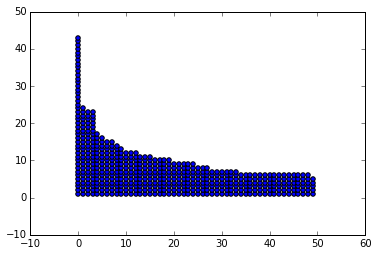

In [20]:
plt.scatter(x,y)

In [21]:
x = []
for i in range(50):
    x.append(swc[i][1])
y = list(range(1,51))[::-1]

In [22]:
x,y

([43,
  24,
  23,
  23,
  17,
  16,
  15,
  15,
  14,
  13,
  12,
  12,
  12,
  11,
  11,
  11,
  10,
  10,
  10,
  10,
  9,
  9,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  7,
  7,
  7,
  7,
  7,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  6,
  5],
 [50,
  49,
  48,
  47,
  46,
  45,
  44,
  43,
  42,
  41,
  40,
  39,
  38,
  37,
  36,
  35,
  34,
  33,
  32,
  31,
  30,
  29,
  28,
  27,
  26,
  25,
  24,
  23,
  22,
  21,
  20,
  19,
  18,
  17,
  16,
  15,
  14,
  13,
  12,
  11,
  10,
  9,
  8,
  7,
  6,
  5,
  4,
  3,
  2,
  1])

In [23]:
words = []
for i in range(50):
    words.append(swc[i][0])
rev_words = words[::-1]
warray = np.array(rev_words)
warray

array(['no', 'can', 'land', 'time', 'down', 'get', 'more', 'old', 'your',
       'take', 'it', 'will', 'about', 'water', 'like', 'voyage', 'why',
       'part', 'do', 'what', 'were', 'and', 'was', 'have', 'by', 'if',
       'into', 'he', 'be', 'upon', 'or', 'his', 'one', 'sea', 'from',
       'some', 'not', 'on', 'they', 'go', 'with', 'my', 'there', 'but',
       'for', 'this', 'you', 'all', 'me', 'i'], 
      dtype='<U6')

In [24]:
plt.grid?

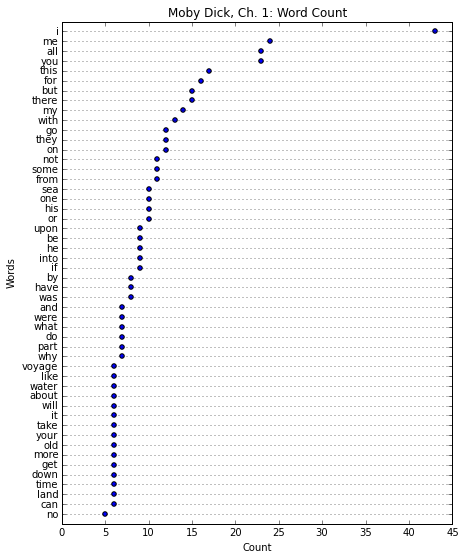

In [28]:
f = plt.figure(figsize=(7,9))
plt.scatter(x, y)
plt.xlim(0,45)
plt.ylim(0,51)
plt.yticks(np.arange(1,51), warray)
plt.grid(axis='y')
plt.title('Moby Dick, Ch. 1: Word Count')
plt.xlabel('Count')
plt.ylabel('Words');

In [26]:
assert True # use this for grading the dotplot